## Dataset analysis


I analyze the datasets, I start by importing them


---

In [1]:
!wget https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip
!unzip fake_news.zip

--2025-01-06 13:55:19--  https://proai-datasets.s3.eu-west-3.amazonaws.com/fake_news.zip
Resolving proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)... 16.12.18.14, 3.5.206.27
Connecting to proai-datasets.s3.eu-west-3.amazonaws.com (proai-datasets.s3.eu-west-3.amazonaws.com)|16.12.18.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42975911 (41M) [application/zip]
Saving to: ‘fake_news.zip’

fake_news.zip       100%[===================>]  40.98M  13.4MB/s    in 3.1s    

2025-01-06 13:55:23 (13.4 MB/s) - ‘fake_news.zip’ saved [42975911/42975911]

Archive:  fake_news.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [2]:
import pandas as pd

df_true = pd.read_csv("True.csv")
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
df_fake = pd.read_csv("Fake.csv")
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


I created a new "category" column that states:
- 1: the news is false;
- 0: the news is true;


---

In [4]:
df_fake['category']=1
df_true['category']=0

In [5]:
df = pd.concat([df_fake, df_true], ignore_index=True) #I merged both datasets into one
df.head()

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
df.isnull().sum() #I check for missing values

,0
title,0
text,0
subject,0
date,0
category,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


## Are fake news more frequent in a certain subject?

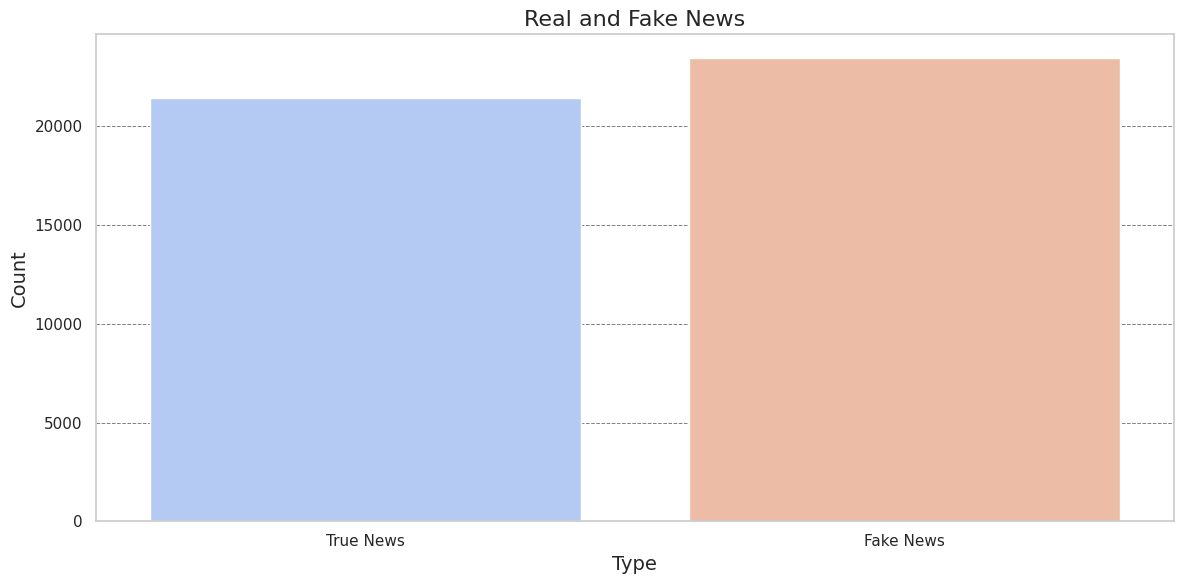

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

palette = sns.color_palette("coolwarm", n_colors=len(df["category"].unique()))
fig = plt.figure(figsize=(12, 6))
graph = sns.countplot( x= 'category',data=df, hue='category', palette=palette, legend=False)

plt.title("Real and Fake News", fontsize=16)
plt.xlabel("Type", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks([0, 1], ['True News', 'Fake News'])

graph.yaxis.grid(True, color="gray", linestyle="--", linewidth=0.7)
graph.xaxis.grid(False)

handles, labels = graph.get_legend_handles_labels()
new_labels = ['True News', 'Fake News']

plt.tight_layout()
plt.show()

We can see from the under-represented graph how **Fake News** is more present within the dataset


---

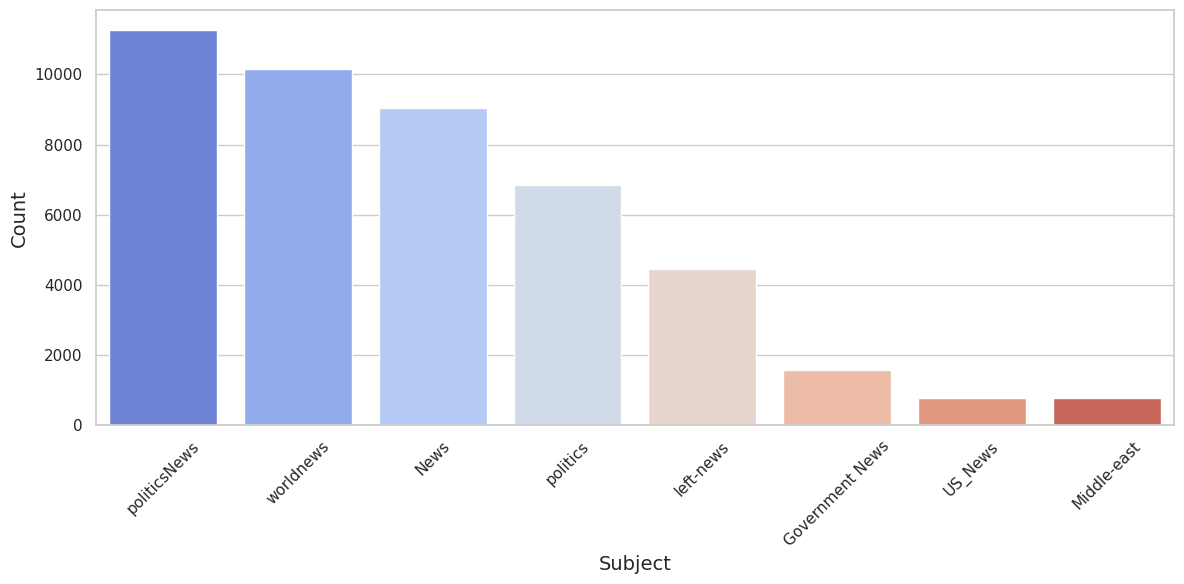

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

subject = df['subject'].value_counts()
sns.set(style="whitegrid")

palette = sns.color_palette("coolwarm", n_colors=len(df["subject"].unique()))
fig = plt.figure(figsize=(12, 6))
sns.barplot(x=subject.index, y=subject.values, hue=subject.index, palette=palette)

plt.xlabel("Subject", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The most present subject within the dataset is '**policsNews**' with a total of 11.272


---


In [10]:
news_counts = df.groupby(['subject', 'category'])['text'].count().unstack(fill_value=0)

for subject, counts in news_counts.iterrows():
    print(f"Subject: {subject}")
    print(f"True News: {counts[0]}")
    print(f"Fake News: {counts[1]}")
    print("----")

Subject: Government News
True News: 0
Fake News: 1570
----
Subject: Middle-east
True News: 0
Fake News: 778
----
Subject: News
True News: 0
Fake News: 9050
----
Subject: US_News
True News: 0
Fake News: 783
----
Subject: left-news
True News: 0
Fake News: 4459
----
Subject: politics
True News: 0
Fake News: 6841
----
Subject: politicsNews
True News: 11272
Fake News: 0
----
Subject: worldnews
True News: 10145
Fake News: 0
----


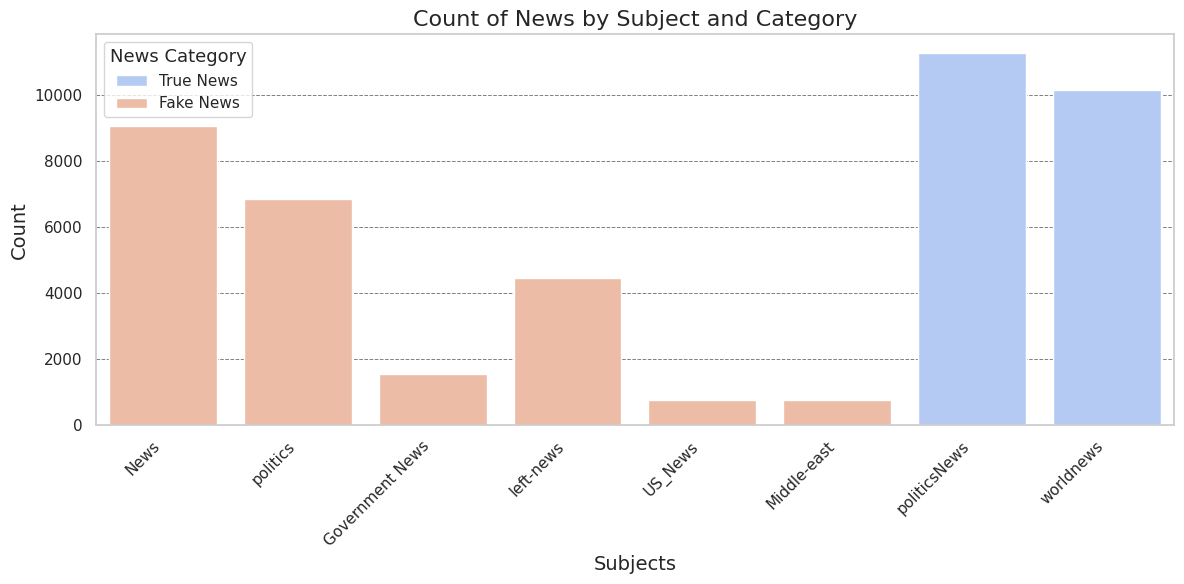

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

palette = sns.color_palette("coolwarm", n_colors=len(df["category"].unique()))

fig = plt.figure(figsize=(12, 6))
graph = sns.countplot(x="subject", data=df, hue="category", palette=palette)

plt.title("Count of News by Subject and Category", fontsize=16)
plt.xlabel("Subjects", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(rotation=45, ha="right")

graph.yaxis.grid(True, color="gray", linestyle="--", linewidth=0.7)
graph.xaxis.grid(False)

handles, labels = graph.get_legend_handles_labels()
new_labels = ['True News', 'Fake News']
plt.legend(handles=handles, labels=new_labels, title='News Category', title_fontsize='13', fontsize='11')

plt.tight_layout()
plt.show()

While here I have made a subdivision of the subjects present. I made a difference between True and Fake News.
- True News includes only two subjects: politicsNews and wordnews;
- Fake News includes News, polics, left-news, Us_News, Middle-east and Government News


---

## Topic Modelling

In [12]:
fake_news = df[df['category'] == 1]

In [13]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
# Data Cleaning
def sent_to_words(items):
    for item in items:
        yield(gensim.utils.simple_preprocess(str(item), deacc=True))

def remove_stopwords(texts):
    return [[word for word in words if word not in stop_words and len(word) >=5] for words in texts]

data_words = list(sent_to_words(fake_news))
data_words = remove_stopwords(data_words)

In [15]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

In [16]:
import gensim
from pprint import pprint

#Number of topics
num_topics = 10

# Let's create LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       passes = 3)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.500*"title" + 0.500*"category"'),
 (1, '0.500*"title" + 0.500*"category"'),
 (2, '0.500*"title" + 0.500*"category"'),
 (3, '0.500*"category" + 0.500*"title"'),
 (4, '0.917*"category" + 0.083*"title"'),
 (5, '0.500*"title" + 0.500*"category"'),
 (6, '0.500*"title" + 0.500*"category"'),
 (7, '0.500*"title" + 0.500*"category"'),
 (8, '0.917*"title" + 0.083*"category"'),
 (9, '0.500*"title" + 0.500*"category"')]


## For each category, are there topics that are more susceptible to fake news?

In [17]:
# I concatenate the 'title' and 'text' columns into a new 'text' column and then remove the 'title', 'subject', 'date' columns
df['text'] = df['title'].str.cat(df['text'], sep=" ")
data = df.drop(columns=['title', 'subject', 'date'], axis =1)

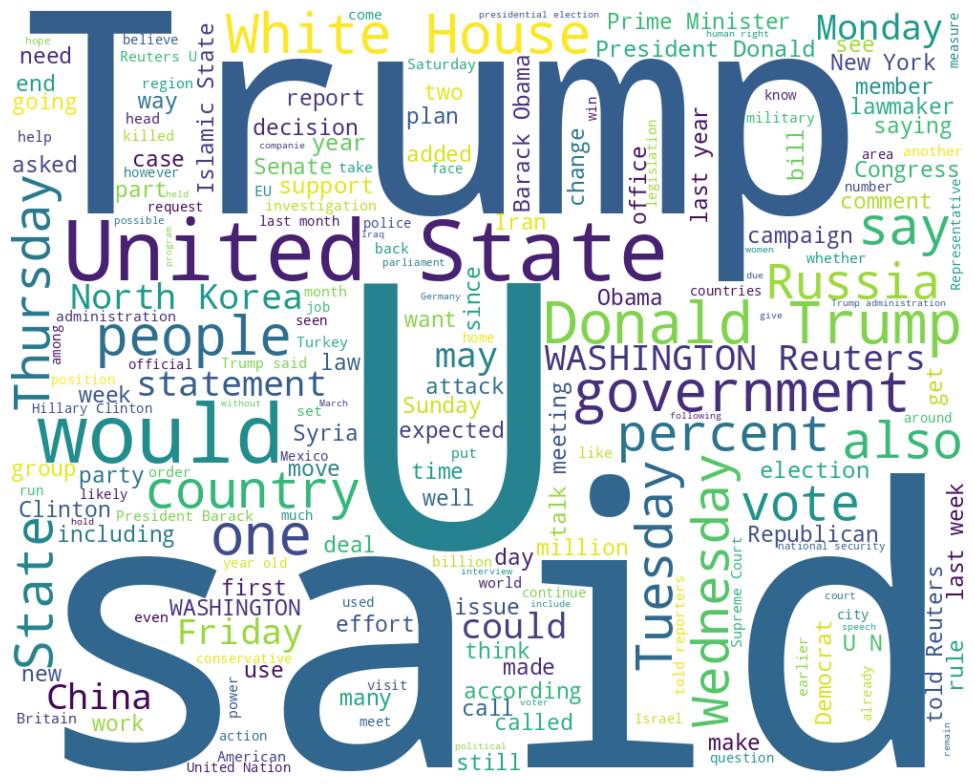

In [18]:
from wordcloud import WordCloud

#I generated a Word Cloud to visualize the most frequent words of the text within the fake news dataset
wordcloud = WordCloud(width=1000, height=800,
                      background_color='white',
                      stopwords= stopwords.words('english'),
                      min_font_size=10).generate(" ".join(data[data['category']==0].text))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

The most frequent words in the dataset containing fake news are: 'Trump', 'United State', 'White House', 'Donald Trump', indicating a strong presence of content related to politics, in particular to the United States and the presidency of Donald Trump.


---



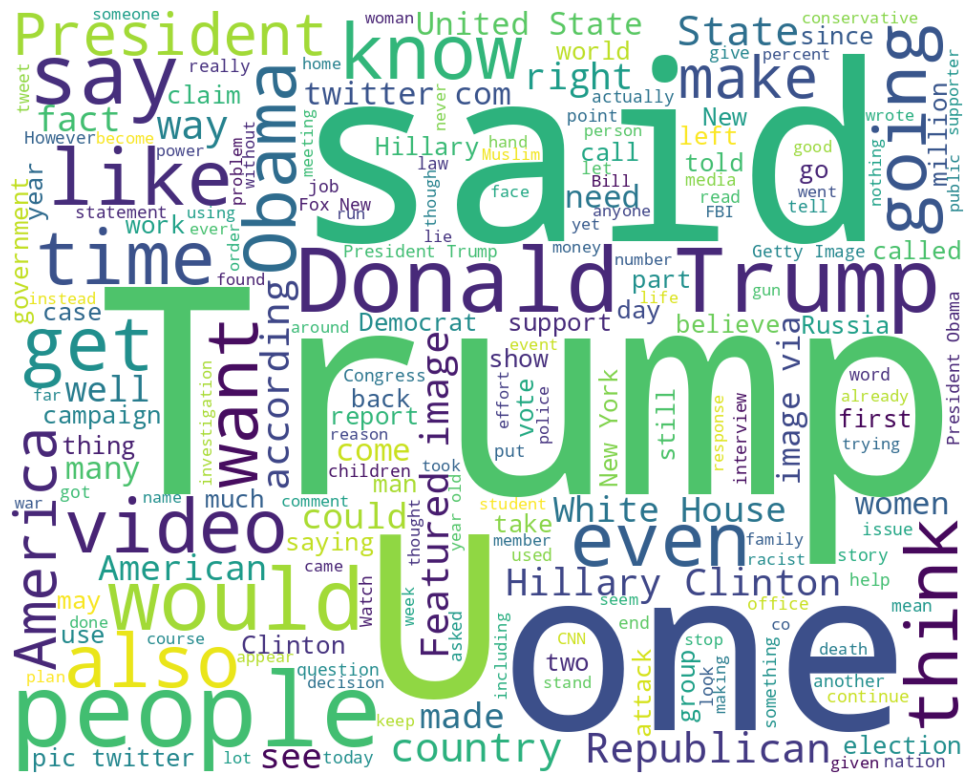

In [19]:
from wordcloud import WordCloud

#I generated a Word Cloud to display the most frequent words of the 'text' within the real news dataset
wordcloud = WordCloud(width=1000, height=800,
                      background_color='white',
                      stopwords= stopwords.words('english'),
                      min_font_size=10).generate(" ".join(data[data['category']==1].text))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

The most frequent words in the dataset containing true news are: 'Trump', 'people', 'said', 'Donald Trump', 'also President'. Trump is a dominant figure even in real news, indicating the centrality of his figure throughout the analyzed text. Real news, like fake news, often deals with topics related to politics and important public figures.


---



## Do fake news titles have patterns?

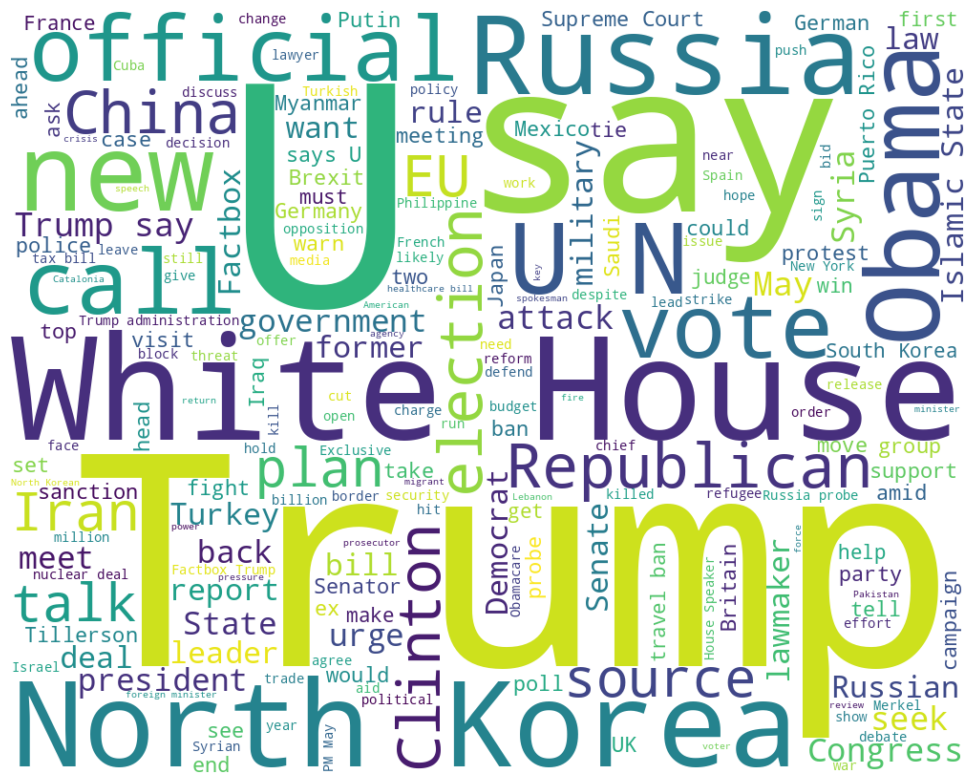

In [20]:
from wordcloud import WordCloud

# I generated a Word Cloud to display the most frequent 'title' words within the fake news dataset
wordcloud = WordCloud(width=1000, height=800,
                      background_color='white',
                      stopwords= stopwords.words('english'),
                      min_font_size=10).generate(" ".join(df[df['category']==0].title))

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

It seems that in the dataset containing titles with 'Russia', 'Obama', 'Trump', 'United State', 'White House', 'North Korea' are more likely to be fake news

---



## Model training

In [21]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

x = df['text']
y = df['category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [22]:
tfidv = TfidfVectorizer()
x_train_tfidv = tfidv.fit_transform(x_train)
x_test_tfidv = tfidv.transform(x_test)

In [23]:
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

I decided to take the **DecisionTreeClassifier** as a classification model


---



In [24]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train_tfidv, y_train)

In [25]:
y_pred = decision_tree.predict(x_test_tfidv)
decision_tree.score(x_test_tfidv, y_test)
accuracy = accuracy_score(y_test, y_pred)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4298
           1       1.00      1.00      1.00      4682

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Model Accuracy: 99.61%


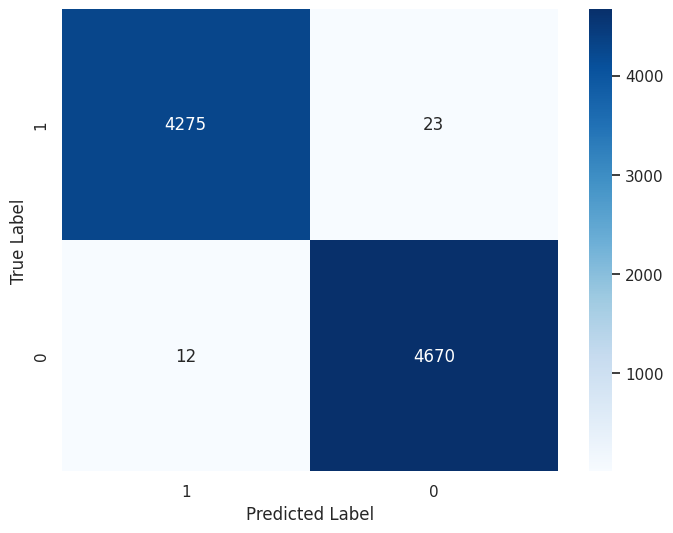

In [27]:
cm = confusion_matrix(y_test, y_pred)

labels = ['1', '0']


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
print("Model Accuracy: {:.2f}%".format(accuracy*100))
plt.show()

From the analysis and representation of the confusion matrix it emerged that the model has an accuracy of **99.60%** and classified only **36** incorrect observations


---



In [29]:
import pickle

# First, save the trained model to 'model.pkl'
with open('model.pkl', 'wb') as file:
    pickle.dump(decision_tree, file)

# Then, you can load it back later using the following (this is your original code)
with open('model.pkl', 'rb') as file:
    decision_tree = pickle.load(file) #I loaded the model with pickle